In [ ]:
from keras.datasets import mnist

In [ ]:
(trainx,trainy),(testx,testy)= mnist.load_data()

In [ ]:
trainx = trainx.astype('float32')/255
testx = testx.astype('float32')/255

In [ ]:
print(trainx.shape,testx.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
#TO CONVERT LAYER GIVE  IN 3D
trainx = trainx.reshape(trainx.shape[0],28,28,1)
testx = testx.reshape(testx.shape[0],28,28,1)

In [ ]:
print(trainx.shape,testx.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#introduce noise in images

noise_factor = 0.5

In [ ]:
import numpy as np

In [ ]:
trainx_noisy = trainx*noise_factor* np.random.normal(loc=0.0, scale = 1.0, size = trainx.shape)
testx_noisy = testx*noise_factor* np.random.normal(loc=0.0, scale = 1.0, size = testx.shape)

In [ ]:
print(trainx[100])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
trainx_noisy = np.clip(trainx_noisy,0.0,1.0)
testx_noisy = np.clip(testx_noisy,0.0,1.0)

In [ ]:
#build autoencoder

from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input , UpSampling2D

In [ ]:
from keras.layers.convolutional import UpSampling2D
ae = Model()
input_img = Input(shape = (28,28,1))
x = Conv2D(32,(3,3),padding='same', activation = 'relu')(input_img)
x = MaxPooling2D((2,2),padding = 'same')(x)
x = Conv2D(32,(3,3),padding='same', activation = 'relu')(x)
encoded = MaxPooling2D((2,2),padding = 'same')(x)

x = Conv2D(32,(3,3), padding = 'same', activation ='relu')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3), padding = 'same', activation ='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),padding = 'same', activation = 'relu')(x)

In [ ]:
ae = Model(input_img, decoded)
ae.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 32)          924

In [ ]:
ae.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy')

In [ ]:
ae.fit(trainx_noisy,trainx,epochs=3, batch_size = 64, validation_data =(trainx_noisy,trainx))

Epoch 1/3
938/938 [==============================] - 214s 226ms/step - loss: 0.1541 - val_loss: 0.1256
Epoch 2/3
938/938 [==============================] - 183s 195ms/step - loss: 0.1275 - val_loss: 0.1201
Epoch 3/3
938/938 [==============================] - 189s 201ms/step - loss: 0.1218 - val_loss: 0.1205


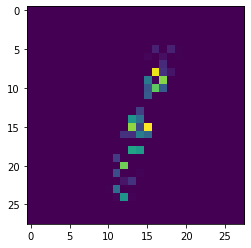

In [ ]:
decoded_img = ae.predict(testx_noisy)
plt.imshow(testx_noisy[5].reshape(28,28))


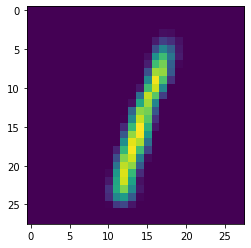

In [ ]:
plt.imshow(decoded_img[5].reshape(28,28))